In [1]:
import pandas as pd
import numpy as np
from decmon.learning import *

## Load pre-computed dataset

In [2]:
# # noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df
# cols_to_drop = ['formula', 'trace', 'strategy']
# # We drop columns that are not numeric (and in our case, present in the dataset in other forms)
# final_df = clean_df(expanded_df, cols_to_drop)

In [3]:
final_df = pd.read_csv('input/all_data.csv.zip')

## Classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [5]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [6]:
y = final_df[TARGET].values

In [7]:
X = final_df.drop(TARGET, axis=1)

In [8]:
X = normalize(X)

In [9]:
X = np.float32(X)
y = np.float32(y)

In [10]:
# Z['asd'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

### K-Neighbours Classifier

In [ ]:
# K Neighbors Classifier
kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES, n_jobs=-1)
kn_classifier.fit(X_train, y_train)

mean_accuracy = kn_classifier.score(X_test, y_test)

#y_pred = kn_classifier.predict(X_test)
#y_pred
mean_accuracy

In [ ]:
# f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_df, TARGET)
#
# kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
# classifier = kn_classifier.fit(f_X_train, f_y_train)
#
# mean_accuracy = classifier.score(f_X_test, f_y_test)
# mean_accuracy

In [17]:
pred_y = kn_classifier.predict(X_test)
f1_score(pred_y, y_test, average=None)

array([0.90578683, 0.85553999, 0.95388763])

In [21]:
import mgzip
import pickle

filename = 'finalized_classifier.mgzip.sav'

with mgzip.open(filename, 'wb') as f:
    pickle.dump(kn_classifier, f)

In [ ]:
# with mgzip.open(filename, 'rb') as f:
#     data = pickle.load(f)

In [25]:
def prepare_learning_sets2(df: DataFrame, target: str) \
        -> (DataFrame, DataFrame, DataFrame, DataFrame):
    """
    Prepare training and testing sets for a given DataFrame and target column.
    :param df: the dataframe to split
    :param target: the target column
    :return: the training and testing sets
    """
    y = df[target].values
    X = df.drop(target, axis=1)
    X = normalize(X)
    X = np.float32(X)
    y = np.float32(y)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
    return X_train, X_test, y_train, y_test

## Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [28]:
def store(filename, data):
    with mgzip.open(filename, 'wb') as f:
        pickle.dump(data, f)

### Linear Regression

In [26]:
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets2(final_df, 'nb_progressions')

In [31]:
store('final/r_prog_X_train.mgzip.sav', f_X_train)
store('final/r_prog_X_test.mgzip.sav', f_X_test)
store('final/r_prog_y_train.mgzip.sav', f_y_train)
store('final/r_prog_y_test.mgzip.sav', f_y_test)

In [32]:
regression = LinearRegression(n_jobs=-1)

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

0.07325800229670532

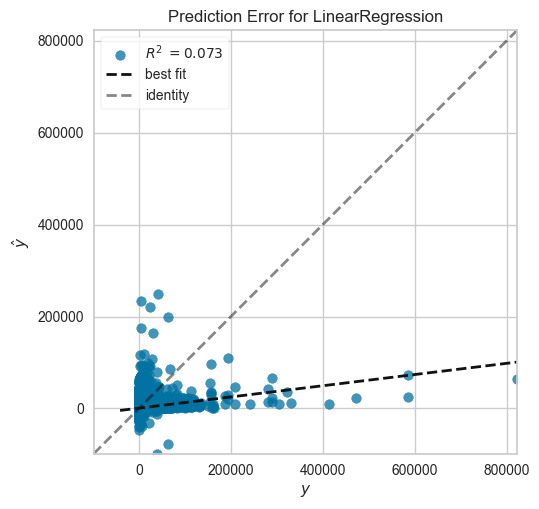

<AxesSubplot: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


# sns.regplot(x="total_bill", y="tip", data=tips);


### SVM

In [34]:
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)

### Neural networks (MLPRegressor)

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
